# Packages

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation

In [2]:
Auto = pd.read_csv("Auto.csv", na_values=['?'])
Auto.index = Auto["name"]
Auto = Auto.drop("name", axis = 1)

# Vérifier les NA

In [3]:
Auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64

In [4]:
Auto = Auto.dropna()

In [5]:
Auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

# a) Nature des predicators

In [6]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


Voici les variables ainsi que leur nature : 
- mpg (consommation de carburant): variable quantitative continue ; 
- cylinders (nombre de cylindres du moteur) : variable quantitative discrète ; 
- displacement (volume des cylindres): variable quantitative discrète ; 
- horsepower (puissance): variable continue, puisque c'est mesurable ; 
- weight (poids) : variable continue, puisque c'est mesurable
- acceleration (temps de 0 à 60 mph) : variable quantative continue
- year (année de fabrication) : textuelle de type date
- origin (zone géographique) : catégoriel

# b) What is the range of each quantitative predictor? 

In [7]:
Auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

In [8]:
Auto_quantitative = Auto.drop(["year", "origin"], axis = 1)
Auto_quantitative

,mpg,cylinders,displacement,horsepower,weight,acceleration
name,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0
buick skylark 320,15.0,8,350.0,165.0,3693,11.5
plymouth satellite,18.0,8,318.0,150.0,3436,11.0
amc rebel sst,16.0,8,304.0,150.0,3433,12.0
ford torino,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6
vw pickup,44.0,4,97.0,52.0,2130,24.6
dodge rampage,32.0,4,135.0,84.0,2295,11.6


In [9]:
Auto_range = Auto_quantitative.max() - Auto_quantitative.min()
Auto_range

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
dtype: float64

# c) Standard deviation

In [10]:
Auto_quantitative.std()

mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
dtype: float64

# d) Now remove the 10th through 85th observations. 

In [11]:
Auto_quantitative = Auto_quantitative.drop(Auto.index[9:85])

In [12]:
Auto_quantitative.std()

mpg               7.912874
cylinders         1.632155
displacement     95.512897
horsepower       33.822711
weight          792.548494
acceleration      2.570191
dtype: float64

L'écart-type a changé puisque c'est sensible aux variations de données.

# e) Investigation par graphique

## Quel continent a produit le plus de véhicule dans notre donnée? 

In [13]:
# Encodage
Auto['origin'] = Auto['origin'].replace({1 : "USA", 
                        2 : "Europe",
                        3 : "Asie"})

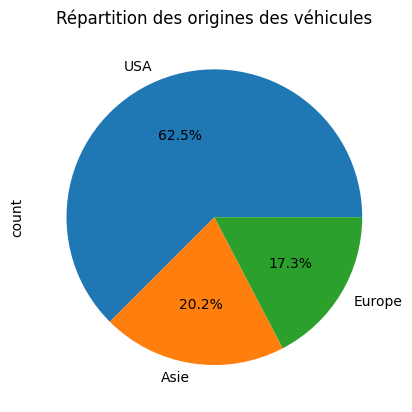

In [22]:
Auto['origin'].value_counts().plot(kind = 'pie',
                                   autopct = '%1.1f%%', 
                                   title = 'Répartition des origines des véhicules')
plt.show()

Les Etats-Unis d'amérique produisent la majorité de voiture dans nos bases de données.

## Les voitures des Etats-Unis sont-t-elles plus puissantes que les autres? 

In [25]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

<Axes: title={'center': 'horsepower'}, xlabel='origin'>

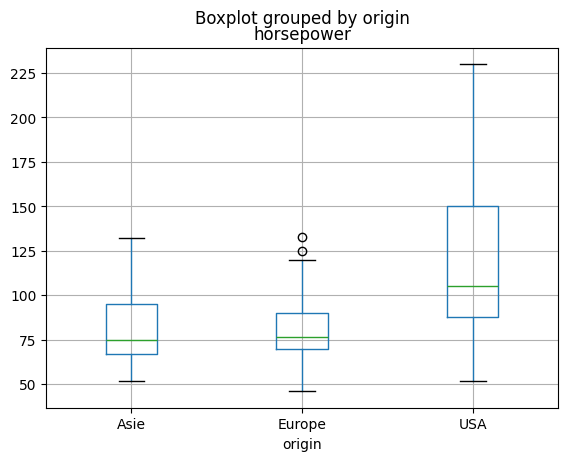

In [27]:
Auto.boxplot("horsepower", by="origin")

La voiture américaine a, en générale, plus de cheveaux (plus de 100 chevaux) que celle de l'Europe et l'Asie (moins de 80). 

## Mais sont-t-elles plus lourd? 

<Axes: title={'center': 'weight'}, xlabel='origin'>

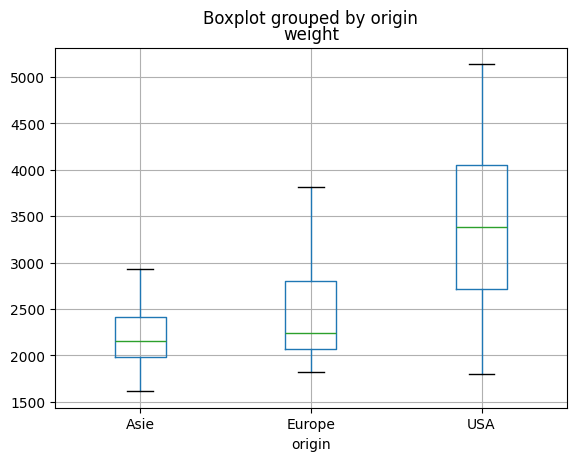

In [28]:
Auto.boxplot("weight", by="origin")

Exactement. La voiture américaine est donc plus lourde même si elle est puissante.

# Y-a-t-il une compensation entre la puissance et la voiture? 

<Axes: title={'center': 'acceleration'}, xlabel='origin'>

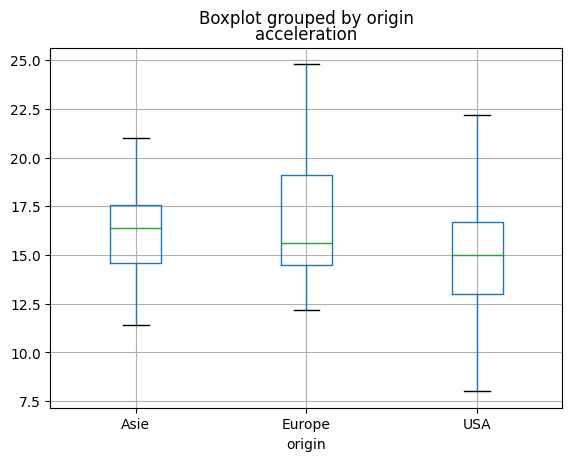

In [29]:
Auto.boxplot("acceleration", by="origin")

Comme on peut voir, la voiture américaine n'est donc pas le plus rapide.

# Quelles sont les variables qui évoluent du même sens que l'accélération? 

In [47]:
Auto_quantitative.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'],
      dtype='object')

<Axes: xlabel='acceleration', ylabel='weight'>

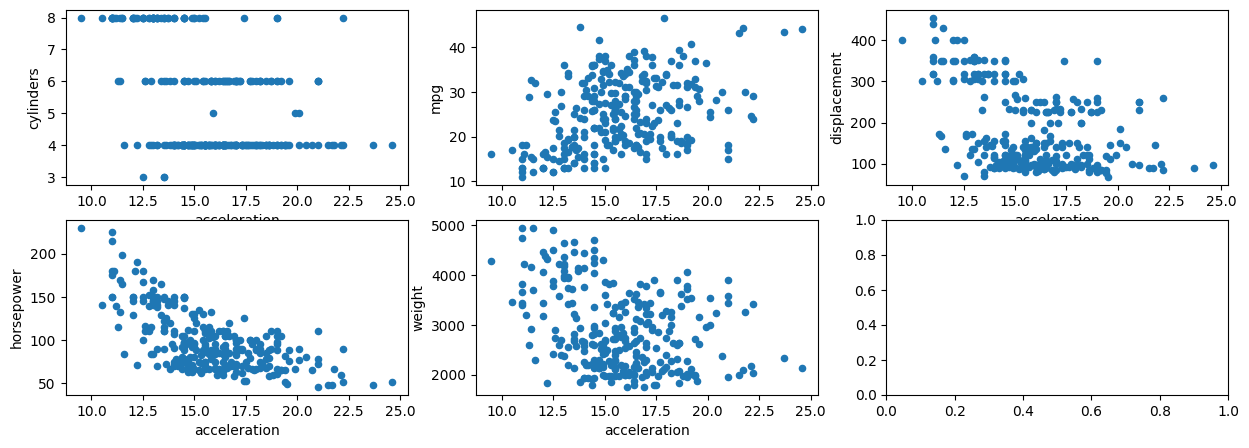

In [61]:
fig, axes = plt.subplots(nrows= 2 , ncols = 3, figsize = (15,5))
Auto_quantitative.plot.scatter('acceleration', 'cylinders', ax = axes[0, 0])
Auto_quantitative.plot.scatter('acceleration', 'mpg', ax = axes[0, 1])
Auto_quantitative.plot.scatter('acceleration', 'displacement', ax = axes[0, 2])
Auto_quantitative.plot.scatter('acceleration', 'horsepower', ax = axes[1, 0])
Auto_quantitative.plot.scatter('acceleration', 'weight', ax = axes[1, 1])

Moins la voiture est économique, plus elle a une accélération foudraouyante.
Le poids de la voiture impacte négativement son accélération. 
A la surprise, la puissance évolue dans le sens contraire que l'accélération. 

# Quelles voitures consomment moins et plus rapide? 

Dans Pandas, il n'y a pas de fonction pour regroupement hue.

In [89]:
import seaborn as sns

sns.scatterplot(
    data=Auto,
    x='acceleration',
    y='mpg',
    hue='origin',
    ax=axes[0, 1] 
)

plt.show()   # seulement ici dans la 2ème cellule

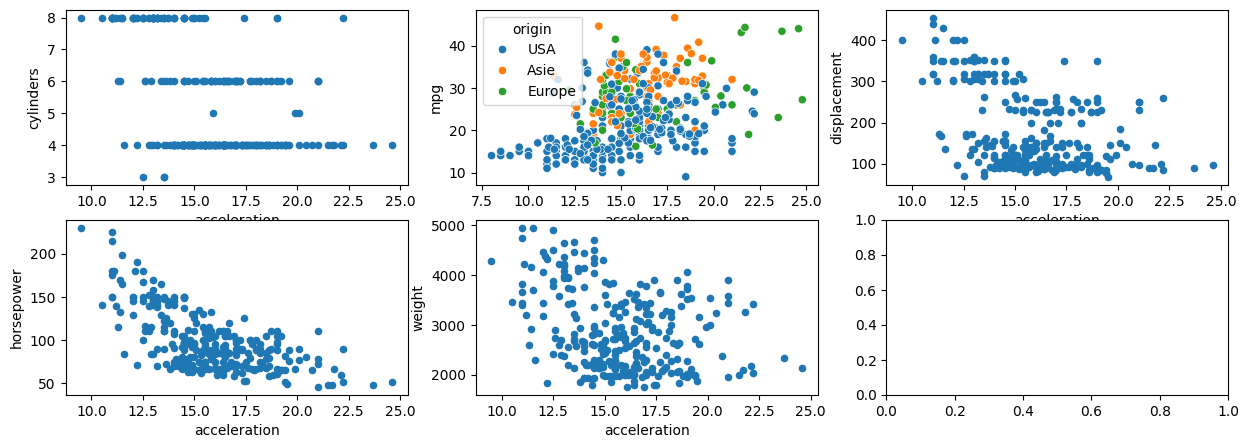

In [90]:
fig

La voiture asiatique consomme plus pour une même accélération que les voitures américaines. La différence entre les voitures américaines et européennes n'est pas palpable.

# f) faisons le même graphique que mpg

<Axes: xlabel='mpg', ylabel='weight'>

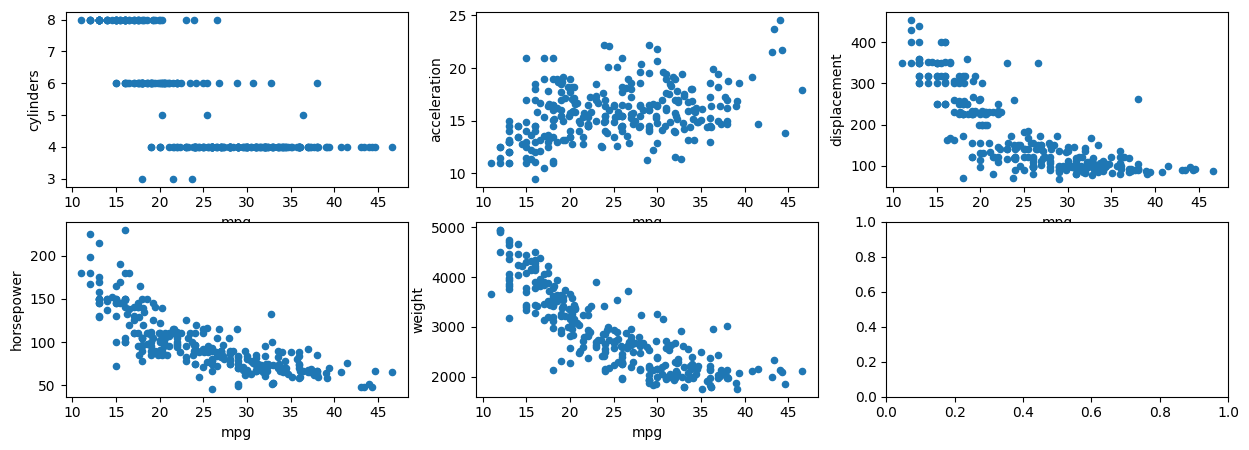

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))

Auto_quantitative.plot.scatter('mpg', 'cylinders',     ax=axes[0, 0])
Auto_quantitative.plot.scatter('mpg', 'acceleration',  ax=axes[0, 1])
Auto_quantitative.plot.scatter('mpg', 'displacement',  ax=axes[0, 2])
Auto_quantitative.plot.scatter('mpg', 'horsepower',    ax=axes[1, 0])
Auto_quantitative.plot.scatter('mpg', 'weight',        ax=axes[1, 1])

L'accélération, la puissance du moteur et le poids peuvent expliquer la consommation de l'automobile en carburant.